# **DAY 19: ASSIGNMENT 15 (Multinomial Naive Bayes Algorithm)**

# **DATE: 24 JUNE 2021**

# **AUTHOR: AAMIR P**

# **REG. ID.: GO_STP_7724** 

**Build a spam filter using Python and the multinomial Naive Bayes algorithm.** 

**Check Spam or Ham? Email Classifier Using Python using MultinomialNB.**

In [1]:
#Libraries
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.isna() #detect missing values in the given series object

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [5]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


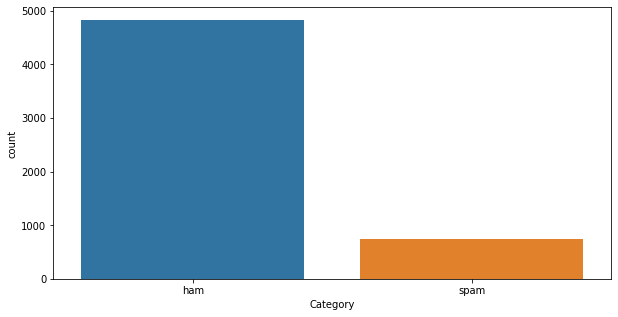

In [6]:
plt.figure(figsize=(10,5)) #figsize is a tuple of the width and height of the figure in inches, and dpi is the dots-per-inch
sns.countplot(df['Category']) #countplot() method is used to Show the counts of observations in each categorical bin using bars.
plt.show()

In [7]:
d={'ham':0,'spam':1}
df.Category=df.Category.map(d) #map values from two series having one column same
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


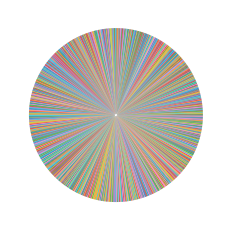

In [8]:
plt.pie(df.Category)
plt.show()

In [9]:
#Split Data
x=df['Message']
y=df['Category']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.4,random_state=42)

In [14]:
from sklearn.naive_bayes import MultinomialNB
#Handle data
from sklearn.feature_extraction.text import CountVectorizer 

In [17]:
#Convert text to numerical
cv = CountVectorizer(stop_words='english') #CountVectorizer is used to convert a collection of text documents to a vector of term/token counts ; Stop words are just a list of words you don't want to use as features. 
xtrain_cv=cv.fit_transform(x_train)
xtest_cv=cv.transform(x_test)


In [18]:
pd.DataFrame(xtrain_cv.toarray(),columns = cv.get_feature_names()) #convert train to an array ; feature extraction

,00,000,000pes,0089,0121,01223585236,01223585334,02,0207,02072069400,02073162414,02085076972,021,03,04,05,050703,0578,06,07,07008009200,07046744435,07099833605,07123456789,0721072,07732584351,07734396839,07753741225,0776xxxxxxx,07781482378,077xxx,07801543489,07808247860,07815296484,07821230901,07880867867,07946746291,0796xxxxxx,07973788240,07xxxxxxxxx,...,yesterday,yetty,yetunde,yhl,yifeng,yijue,ym,yo,yoga,yogasana,yor,yorge,youdoing,young,younger,youre,yourinclusive,yourjob,youuuuu,yoville,yoyyooo,yr,yrs,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zealand,zebra,zed,zhong,zoe,zogtorius,zoom,zouk,èn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3338,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3341,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
mlt=MultinomialNB()
mlt.fit(xtrain_cv,y_train)
mlt.score(xtest_cv,y_test) #Checking best score

0.9865410497981157

In [20]:
pred=mlt.predict(xtest_cv)
print(pred)

[0 0 0 ... 0 0 0]


In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred) #Diagonal ones are correct
cm

array([[1924,   14],
       [  16,  275]])

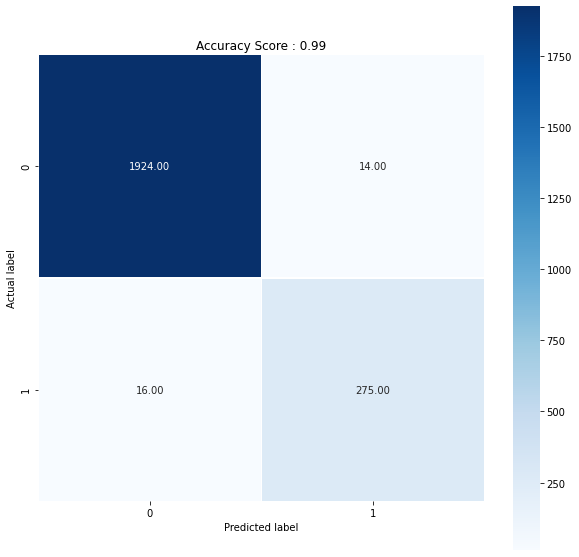

In [26]:
#Visulization
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True, fmt= ".2f",linewidths=.10,square=True, cmap ='Blues' ) #annot -  If True, write the data value in each cell ; fmt - single formatting ; .2f - float point number; cmap() in Python represents a change in the lightness of two different colors that meet in the middle and beginning/end at an unsaturated color
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
A=f'Accuracy Score :{accuracy: .2f}'
plt.title(A)
plt.show()